In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import calendar
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import kpss
import xgboost

In [20]:
#load datasets
train = pd.read_csv('train(2).csv', low_memory=False)
stores = pd.read_csv('store (1).csv')
test = pd.read_csv('test(1).csv')

In [21]:
#check missing values 
def missing_values(df):
    missing_count = df.isnull().sum() 
    missing_percentage = (missing_count / len(df)) * 100  # Percentage of missing values in each column
    
    summary_df = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage of Total Missing': missing_percentage
    })
    print(summary_df)

In [22]:
missing_values(stores)

                           Missing Values  Percentage of Total Missing
Store                                   0                     0.000000
StoreType                               0                     0.000000
Assortment                              0                     0.000000
CompetitionDistance                     3                     0.269058
CompetitionOpenSinceMonth             354                    31.748879
CompetitionOpenSinceYear              354                    31.748879
Promo2                                  0                     0.000000
Promo2SinceWeek                       544                    48.789238
Promo2SinceYear                       544                    48.789238
PromoInterval                         544                    48.789238


In [28]:
missing_values(merged_df)

                           Missing Values  Percentage of Total Missing
Store                                   0                     0.000000
DayOfWeek                               0                     0.000000
Date                                    0                     0.000000
Sales                                   0                     0.000000
Customers                               0                     0.000000
Open                                    0                     0.000000
Promo                                   0                     0.000000
StateHoliday                            0                     0.000000
SchoolHoliday                           0                     0.000000
StoreType                               0                     0.000000
Assortment                              0                     0.000000
CompetitionDistance                  2186                     0.258884
CompetitionOpenSinceMonth          268619                    31.812120
Compet

In [24]:
merged_df = pd.merge(train, stores, on='Store', how='left')

In [25]:
#set index
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True)
merged_df.index = merged_df['Date']
merged_df = merged_df.sort_index(ascending = True)

In [26]:
merged_df = merged_df[merged_df['Open'] == 1]

C:\Users\mimi_\AppData\Local\Temp\ipykernel_20700\570210145.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='StoreType', y='Sales', estimator=sum, ci=None, color='#33CCCC')


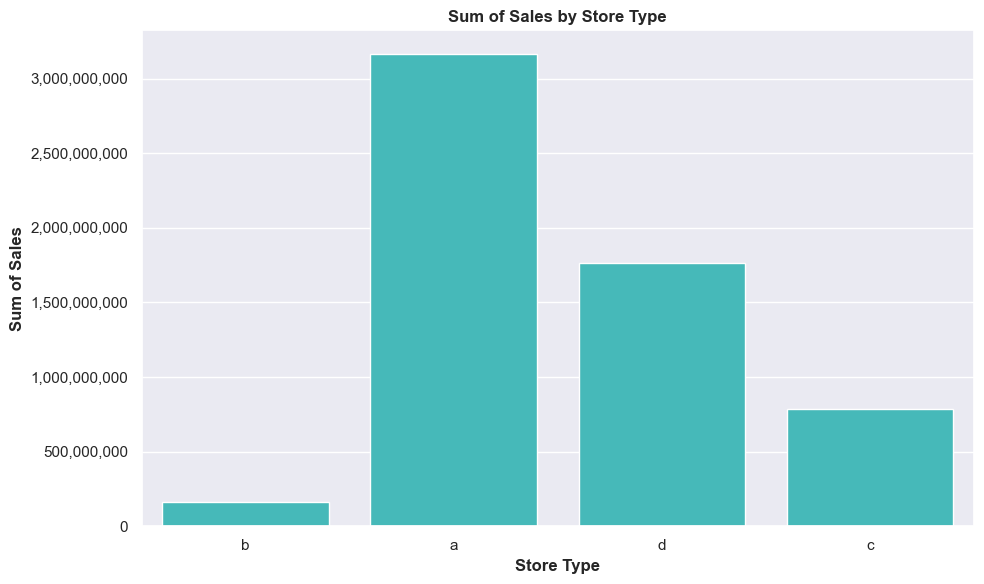

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
# Filter or sample data if necessary
# merged_df_filtered = merged_df.sample(n=1000)  # Example of sampling

# Use Seaborn for plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data=merged_df, x='StoreType', y='Sales', estimator=sum, ci=None, color='#33CCCC')

# Setting the y-axis label to display numbers in a non-scientific format
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # Adds comma as thousand separator

plt.xlabel('Store Type', weight='bold')
plt.ylabel('Sum of Sales', weight='bold')
plt.title('Sum of Sales by Store Type', weight='bold')

plt.tight_layout()
plt.show()

C:\Users\mimi_\AppData\Local\Temp\ipykernel_20700\2984282166.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='Promo', y='Sales', estimator='mean', ci=None, color=bar_color)


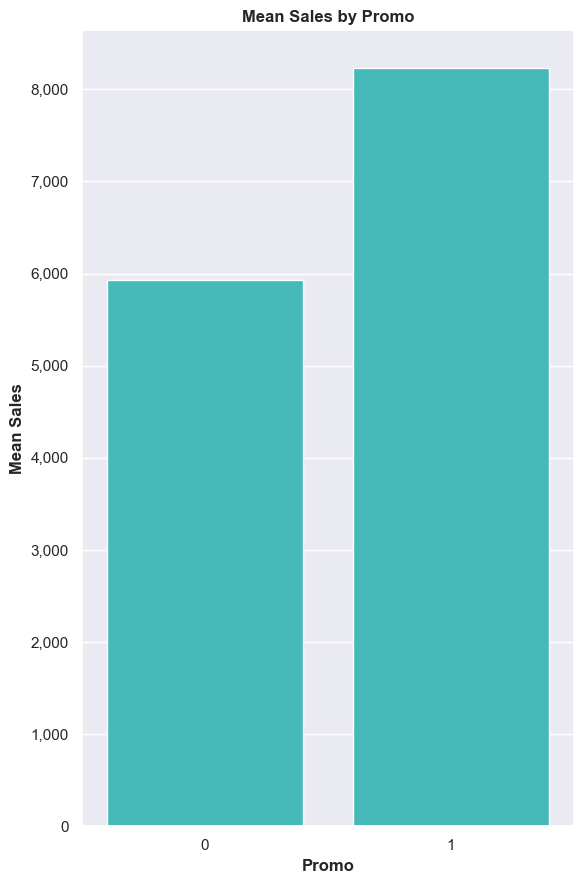

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color used in the previous plot
bar_color = '#33CCCC'

# Plotting
plt.figure(figsize=(6, 9))
sns.barplot(data=merged_df, x='Promo', y='Sales', estimator='mean', ci=None, color=bar_color)

# Setting the y-axis label to display numbers in a non-scientific format
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # Adds comma as thousand separator

plt.xlabel('Promo', weight='bold')
plt.ylabel('Mean Sales', weight='bold')
plt.title('Mean Sales by Promo', weight='bold')

plt.tight_layout()
plt.show()

C:\Users\mimi_\AppData\Local\Temp\ipykernel_1592\3939177255.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


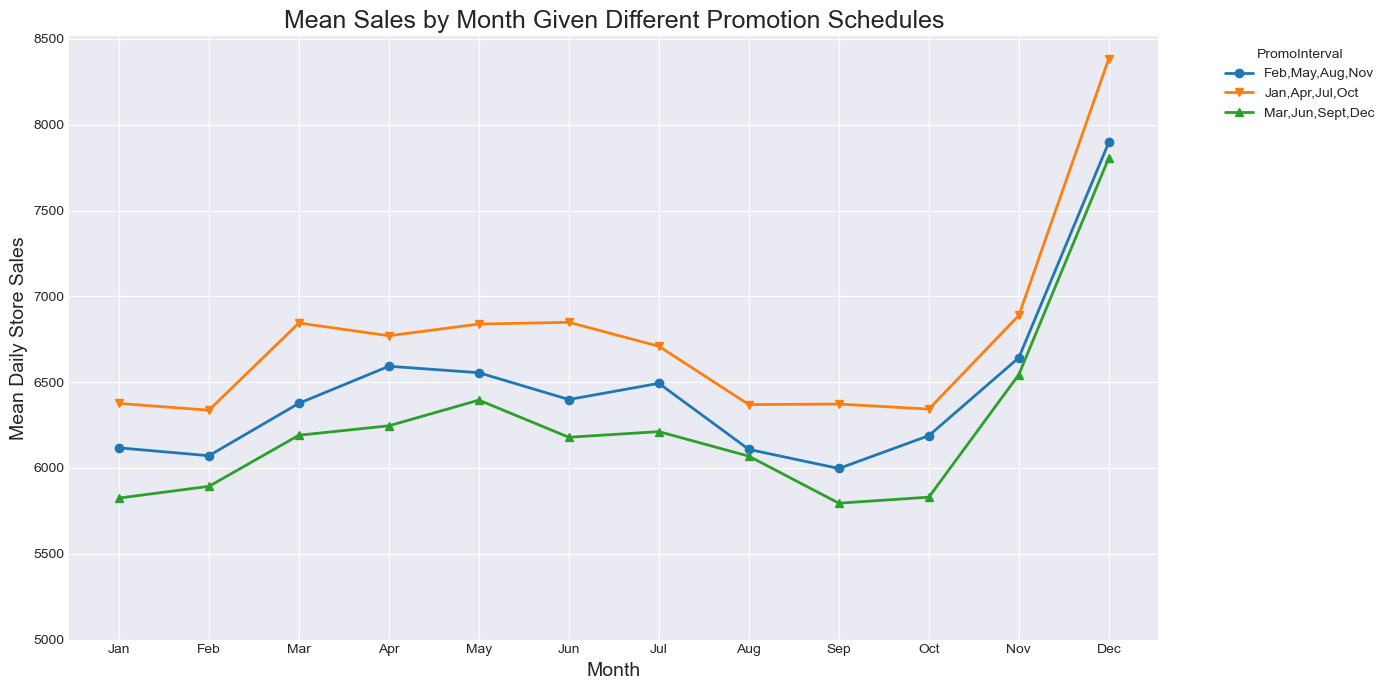

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
merged_df['month'] = merged_df.index.month
# Assuming 'merged_df' is your DataFrame with a datetime index or a 'month' column
# Let's assume 'merged_df' has columns ['PromoInterval', 'month', 'Sales'] among others

# Step 1: Group the data by 'PromoInterval' and 'month', then calculate the mean 'Sales'
grouped_data = merged_df.groupby(['PromoInterval', 'month'])['Sales'].mean()

# Step 2: Unstack the 'PromoInterval' to pivot it into the columns, making months the rows
unstacked_data = grouped_data.unstack(level='PromoInterval')

# Plotting setup using a nice style
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(14, 7))  # A larger figure size for better visibility

# Define a color palette
colors = plt.cm.tab10.colors  # This provides a tuple of colors for differentiation

# Step 3: Plot each 'PromoInterval'
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd']
for i, (column, color) in enumerate(zip(unstacked_data.columns, colors)):
    unstacked_data[column].plot(
        ax=ax,
        marker=markers[i % len(markers)],  # Cycle through markers if more lines than markers available
        color=color,
        linewidth=2,
        label=column  # 'column' here represents each unique 'PromoInterval'
    )

# Customize the plot with titles, labels, and ticks
ax.set_title('Mean Sales by Month Given Different Promotion Schedules', fontsize=18)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Mean Daily Store Sales', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.yticks(fontsize=10)
ax.set_ylim(bottom=5000)  # Set y-axis to start from 5000 if needed

# Legend outside the plot for clarity
ax.legend(title='PromoInterval', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to not overlap elements
plt.show()

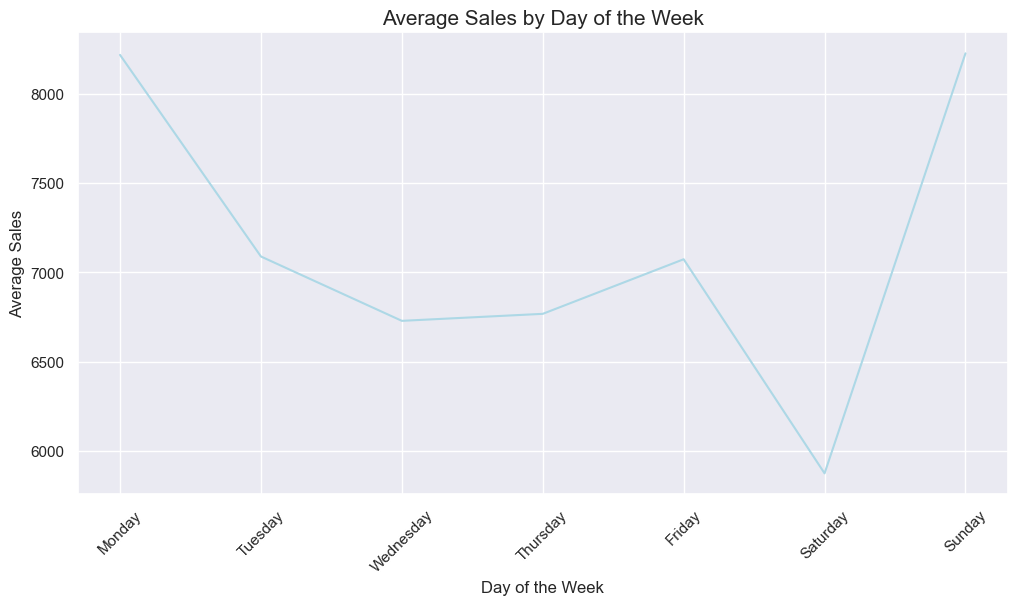

In [116]:
merged_df['day_of_week'] = merged_df.index.dayofweek

# Map the day of the week to more readable form (optional)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
merged_df['day_of_week_name'] = merged_df['day_of_week'].map(day_names)

# Calculate mean sales by day of the week
weekly_means = merged_df.groupby('day_of_week_name')['Sales'].mean().reindex(day_names.values()).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_week_name', y='Sales', data=weekly_means, color='lightblue')
plt.title('Average Sales by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)  # Improve readability of the day names
plt.show()

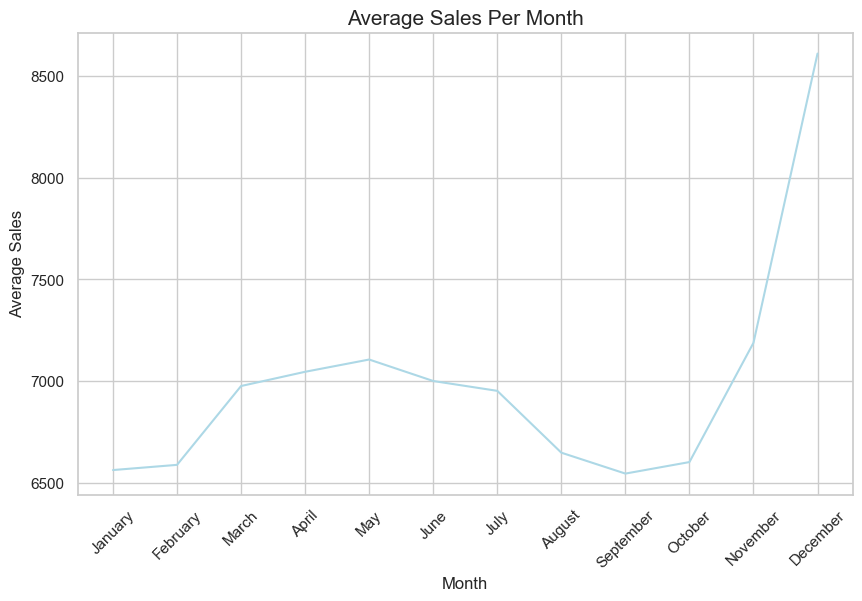

In [117]:
merged_df['month'] = merged_df.index.month
monthly_means = merged_df.groupby('month')['Sales'].mean().reset_index()

# Mapping month numbers back to names for better readability in the plot
monthly_means['month'] = monthly_means['month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))

# Plotting the mean sales per month
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Sales', data=monthly_means, color='lightblue')

# Customize the plot
plt.title('Average Sales Per Month', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

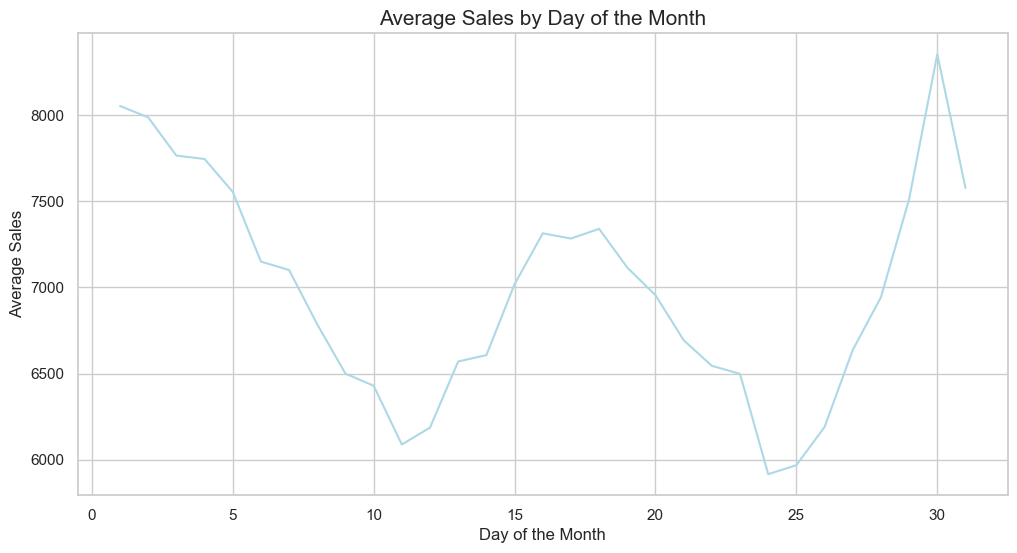

In [118]:
# Group by day of the month and calculate mean sales
merged_df['day_of_month'] = merged_df.index.day
daily_means = merged_df.groupby('day_of_month')['Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_month', y='Sales', data=daily_means, color='lightblue')
plt.title('Average Sales by Day of the Month', fontsize=15)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

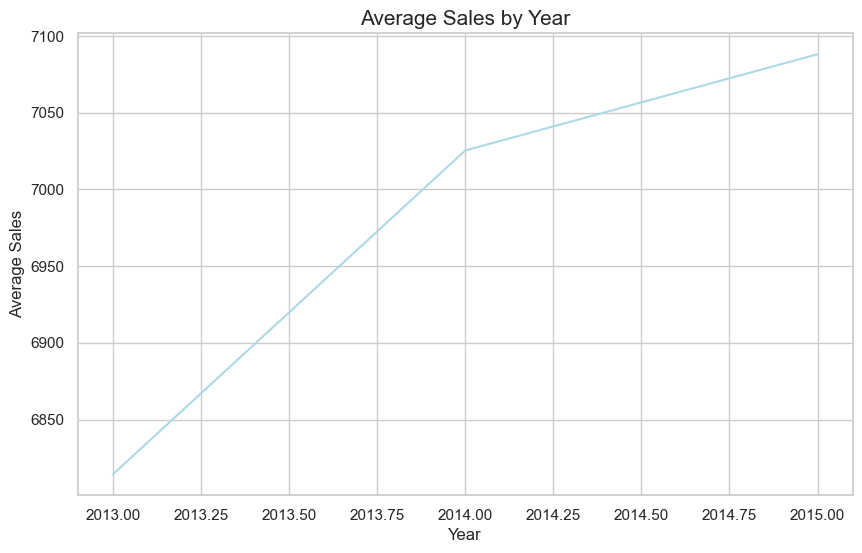

In [119]:
# Group by year and calculate mean sales
merged_df['year'] = merged_df.index.year
yearly_means = merged_df.groupby('year')['Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Sales', data=yearly_means, color='lightblue')
plt.title('Average Sales by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

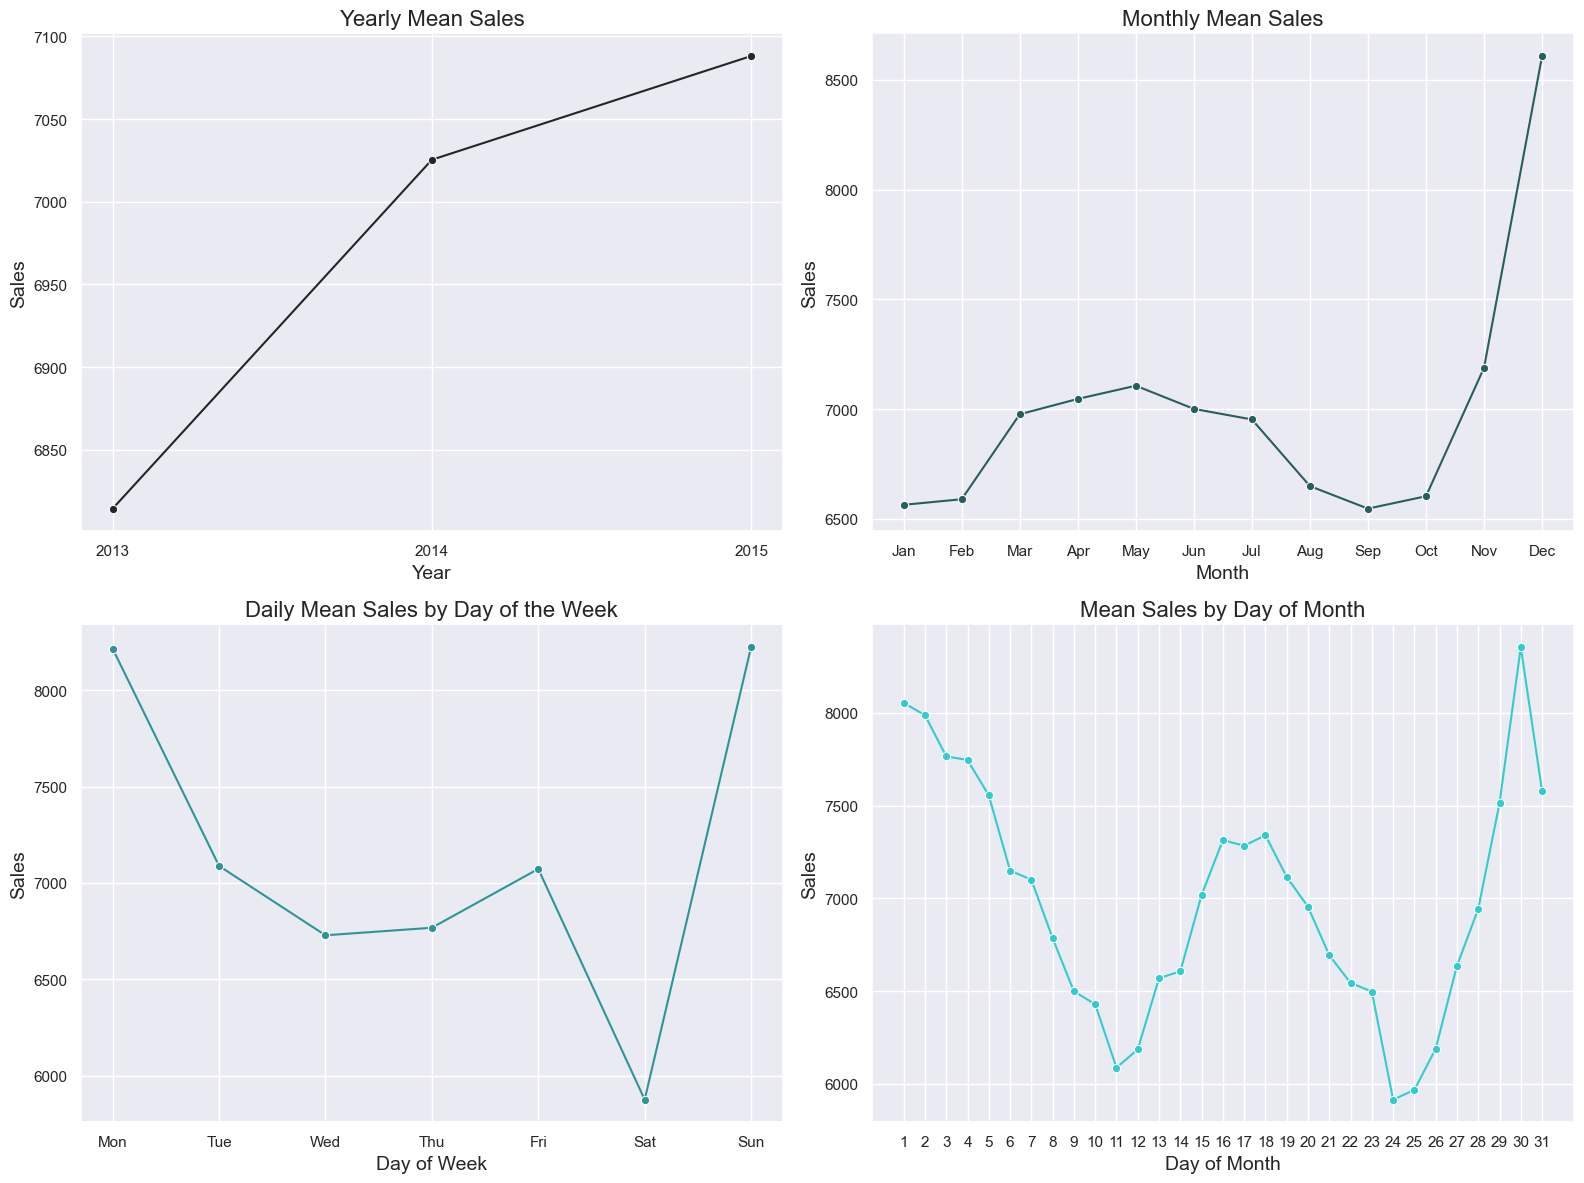

In [120]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a dark grid with customized darker lines for better contrast
sns.set_theme(style="darkgrid")

# Create a new figure
plt.figure(figsize=(16, 12))

# Define a darker color palette based on #33CCCC
colors = sns.dark_palette("#33CCCC", n_colors=4)

# CREATING A LINE CHART FOR YEARLY MEAN SALES
plt.subplot(2, 2, 1)
yearly_mean_sales = merged_df['Sales'].resample('Y').mean()
sns.lineplot(x=yearly_mean_sales.index.year, y=yearly_mean_sales.values, marker='o', linestyle='-', color=colors[0])
plt.title("Yearly Mean Sales", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.xticks(np.unique(yearly_mean_sales.index.year).astype(int))

# ADJUSTED MONTHLY MEAN SALES
plt.subplot(2, 2, 2)
sns.lineplot(x=np.arange(1, 13), y=merged_df.groupby(merged_df.index.month)['Sales'].mean().values, marker='o', linestyle='-', color=colors[1])
plt.title("Monthly Mean Sales", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# DAILY MEAN SALES BY DAY OF THE WEEK
plt.subplot(2, 2, 3)
merged_df['day_of_week'] = merged_df.index.dayofweek
daily_mean_sales_dow = merged_df.groupby('day_of_week')['Sales'].mean()
sns.lineplot(x=daily_mean_sales_dow.index, y=daily_mean_sales_dow.values, marker='o', linestyle='-', color=colors[2])
plt.title("Daily Mean Sales by Day of the Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.xticks(range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# MEAN SALES BY DAY OF MONTH
plt.subplot(2, 2, 4)
# Group by day of month and calculate mean sales
day_of_month_mean_sales = merged_df.groupby(merged_df.index.day)['Sales'].mean()
sns.lineplot(x=day_of_month_mean_sales.index, y=day_of_month_mean_sales.values, marker='o', linestyle='-', color=colors[3])
plt.title("Mean Sales by Day of Month", fontsize=16)
plt.xlabel("Day of Month", fontsize=14)
plt.ylabel("Sales", fontsize=14)
# Ensure x-ticks are set for every day of the month
plt.xticks(range(1, 32), labels=[str(day) for day in range(1, 32)])

# Adjust layout
plt.tight_layout()

# Save the plot as a single image
plt.savefig('combined_plots.png')

# Show the plot
plt.show()

In [17]:
def weeks_passed_since_promo(row, current_date):
    if pd.isna(row['Promo2SinceYear']) or pd.isna(row['Promo2SinceWeek']):
        return 0  # Skip NaN values
    # Calculate the starting date of the promo
    year = int(row['Promo2SinceYear'])
    week = int(row['Promo2SinceWeek'])
    promo_start_date = pd.Timestamp(year=year, month=1, day=1) + pd.Timedelta(weeks=week-1)
    
    # Check if the promo start date is after the current observation date
    if promo_start_date > current_date:
        return 0 # or return a specific code indicating future promo

    # Calculate the difference in weeks
    weeks_passed = (current_date - promo_start_date).days // 7
    return weeks_passed

# Apply the function
merged_df['weeks_passed_since_promo'] = merged_df.apply(lambda row: weeks_passed_since_promo(row, current_date=row.name), axis=1)

In [121]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Prepare the data for imputation
# Ensure we're selecting the column as a DataFrame to maintain the structure
impute_data = merged_df[['CompetitionDistance']]

# Initialize the MICE imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10),  # Adjusted for example simplicity
                           missing_values=np.nan, max_iter=10, random_state=91, imputation_order='ascending')

# Fit the imputer model and transform the data to fill in the missing values
# The output will be a 2D numpy array, which we need to assign back correctly
imputed_data = imputer.fit_transform(impute_data)

# Correctly update the original DataFrame's 'CompetitionDistance' column with the imputed data
merged_df['CompetitionDistance'] = imputed_data[:, 0]  # Select the first column of the 2D array

# Display the updated DataFrame to confirm 'CompetitionDistance' is present and imputed
print(merged_df)

            Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
Date                                                                     
2013-01-01    353          2 2013-01-01   3139        820     1      0   
2013-01-01    335          2 2013-01-01   2401        482     1      0   
2013-01-01    512          2 2013-01-01   2646        625     1      0   
2013-01-01    494          2 2013-01-01   3113        527     1      0   
2013-01-01    530          2 2013-01-01   2907        532     1      0   
...           ...        ...        ...    ...        ...   ...    ...   
2015-07-31    746          5 2015-07-31   9082        638     1      1   
2015-07-31    747          5 2015-07-31  10708        826     1      1   
2015-07-31    748          5 2015-07-31   7481        578     1      1   
2015-07-31    742          5 2015-07-31  10460       1016     1      1   
2015-07-31      1          5 2015-07-31   5263        555     1      1   

           StateHoliday  SchoolHolida

In [19]:
merged_df['CompetitionDistance'].head()

Date
2013-01-01      900.0
2013-01-01       90.0
2013-01-01      590.0
2013-01-01     1260.0
2013-01-01    18160.0
Name: CompetitionDistance, dtype: float64

In [20]:
from datetime import datetime
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
def calculate_months_passed(df):
    # Result list to hold the calculation for each row
    months_passed = []
    
    for index, row in merged_df.iterrows():  # index is the date for each observation
        if pd.isna(row['CompetitionOpenSinceYear']) or pd.isna(row['CompetitionOpenSinceMonth']):
            # If the competition open year or month is NaN, keep the result as NaN
            months_passed.append(np.nan)
        else:
            # Creating a datetime object for the competition's opening date
            open_date = datetime(int(row['CompetitionOpenSinceYear']), int(row['CompetitionOpenSinceMonth']), 1)
            
            # Check if the competition open date is in the future relative to the observation date
            if index < open_date:
                # If the competition is set to open in the future, set the result to NaN
                months_passed.append(np.nan)
            else:
                # If the competition is already open, calculate the difference in months
                diff = relativedelta(index, open_date)
                months_passed.append(diff.years * 12 + diff.months)

    return months_passed

# Make sure your DataFrame index is in datetime format
merged_df.index = pd.to_datetime(merged_df.index)

# Assuming your DataFrame is 'df' with 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth'
merged_df['months_passed'] = calculate_months_passed(merged_df)

In [122]:

merged_df["week"] = merged_df.index.isocalendar().week
merged_df["day_of_month"] = merged_df.index.day
merged_df["year"] = merged_df.index.year

In [101]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844392 entries, 2013-01-01 to 2015-07-31
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        844392 no

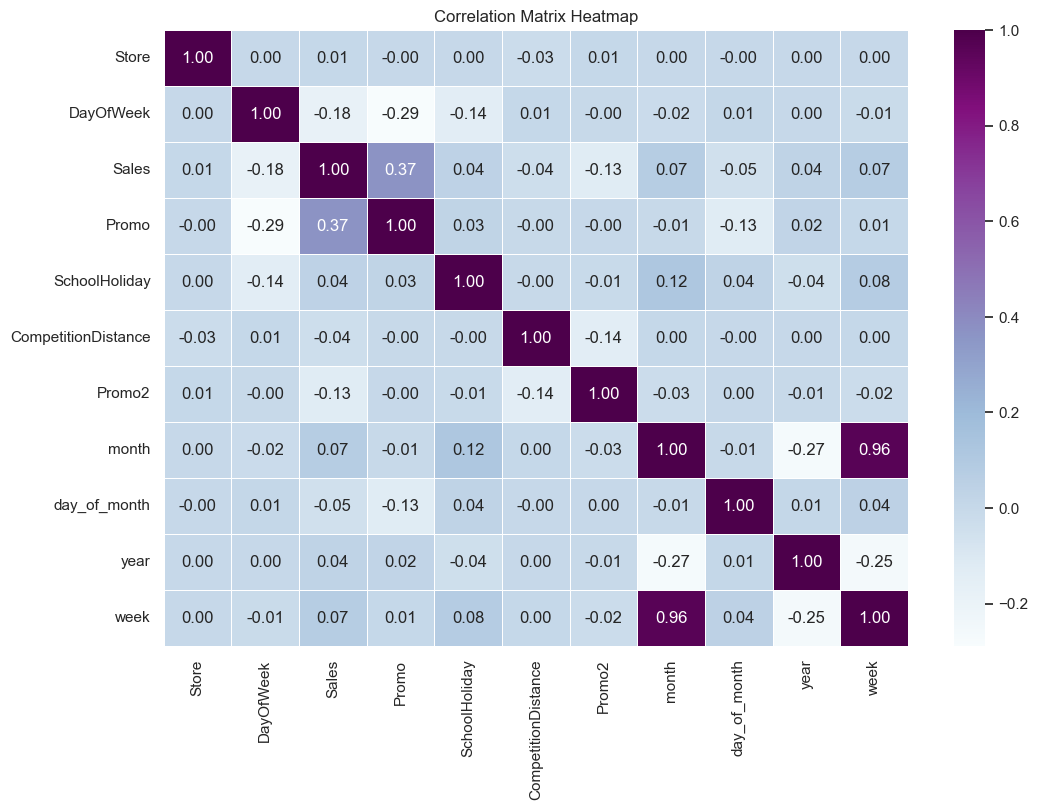

In [102]:
merged_df1=merged_df.drop(['Date', 'Assortment', 'Open','StoreType', 'Customers', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'StateHoliday', 'day_of_week_name', 'day_of_week'], axis=1)
num_attributes = merged_df1.select_dtypes( include = ['int32', 'int64', 'float64'] )
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df1.corr(), annot=True,fmt = '.2f', cmap="BuPu", linewidths=0.5)
# Change the display format .descibe doesn't use scientific notation.
#pd.set_option('display.float_format', '{:.2f}'.format)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [123]:
map_dict = {0: 'None', 'a': 'Public', 'b':'Easter', 'c':'Christmas'}

merged_df['StateHoliday'] = merged_df['StateHoliday'].map(map_dict)
merged_df['StateHoliday'] = merged_df['StateHoliday'].fillna('None')


In [124]:
max_value = 12
merged_df['month_sin'] = np.sin(2 * np.pi * merged_df['month'] / max_value)
merged_df['month_cos'] = np.cos(2 * np.pi * merged_df['month'] / max_value)

In [125]:
max_day_of_month = 31

# Cyclical transformation
merged_df['day_of_month_sin'] = np.sin(2 * np.pi * merged_df['day_of_month'] / max_day_of_month)
merged_df['day_of_month_cos'] = np.cos(2 * np.pi * merged_df['day_of_month'] / max_day_of_month)

In [126]:
# Perform the cyclical transformation
max_day_of_week = 6
merged_df['day_of_week_sin'] = np.sin(2 * np.pi * merged_df['DayOfWeek'] / (max_day_of_week + 1))
merged_df['day_of_week_cos'] = np.cos(2 * np.pi * merged_df['DayOfWeek'] / (max_day_of_week + 1))

In [127]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Assortment' column
merged_df['Assortment_encoded'] = label_encoder.fit_transform(merged_df['Assortment'])

In [128]:
df_encoded = pd.get_dummies(merged_df, columns=['StateHoliday', 'StoreType'], dtype=int)

In [129]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844392 entries, 2013-01-01 to 2015-07-31
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   SchoolHoliday              844392 non-null  int64         
 8   Assortment                 844392 non-null  object        
 9   CompetitionDistance        844392 non-null  float64       
 10  CompetitionOpenSinceMonth  575773 non-null  float64       
 11  CompetitionOpenSinceYear   575773 no

In [147]:
model = df_encoded.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval','Customers','Assortment', 'Open', 'month', 'day_of_month', 'DayOfWeek','day_of_week', 'day_of_week_name', 'week'], 
                        axis = 1)
##

In [148]:
training_df = model[:'2015-06-11']
validation_df = model['2015-06-12':]

In [149]:
training_df = training_df.drop('Date', axis=1)
validation_df = validation_df.drop('Date', axis=1)

In [150]:
y = training_df['Sales']
X = training_df.drop(['Sales'], axis = 1)

validation_y = validation_df['Sales']
validation_X = validation_df.drop(['Sales'], axis = 1)

In [151]:
# Define RMSPE function
def rmspe(y_true, y_pred):
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    
    percentage_error = (np.abs(y_true - y_pred) / y_true) * 100
    rmspe = np.sqrt(np.mean(percentage_error ** 2))
    return rmspe

In [152]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define RMSPE function
def rmspe(y_true, y_pred):
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    
    percentage_error = (np.abs(y_true - y_pred) / y_true) * 100
    rmspe = np.sqrt(np.mean(percentage_error ** 2))
    return rmspe

# Instantiate an XGBoost Regressor Model
xgb_model = XGBRegressor(random_state=91, n_jobs=-1)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [600],  # Number of boosting rounds (trees).
    'max_depth': [6,7,9],  # Maximum depth of each tree.
    'learning_rate': [0.1, 0.01],  # The learning rate.
    'reg_alpha': [0.0],  # L1 regularization term.
    'reg_lambda': [0.0],  # L2 regularization term.
}

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=3)  # Adjust the number of splits as needed

# Initialize a list to store the root mean square percentage errors (RMSPE) for each fold
rmspe_scores = []

# Creating RandomizedSearch CV grid
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid,n_iter=10, scoring='neg_root_mean_squared_error',random_state=91,cv=tscv, n_jobs=-1
)
# Iterate through each fold of the TimeSeriesSplit
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Perform hyperparameter tuning on the training data for this fold
    random_search.fit(X_train, y_train)

    # Get the best estimator with tuned hyperparameters
    best_xgb_model = random_search.best_estimator_

    # Make predictions on the test set
    predictions = best_xgb_model.predict(X_test)

    # Calculate RMSPE for this fold
    rmspe_value = rmspe(y_test, predictions)
    rmspe_scores.append(rmspe_value)

    # Evaluate the model for this fold
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    print(f'Fold RMSPE: {rmspe_value:.2f}%')
    print(f'Fold Root Mean Squared Error: {rmse}')
    print(f'Fold R-squared: {r2}')
    print(f'Best Hyperparameters: {random_search.best_params_}')
    print('\n')

# Calculate the mean of RMSPE scores across all folds
average_rmspe = np.mean(rmspe_scores)
print(f'Average RMSPE across folds: {average_rmspe:.2f}%')

# Calculate the mean of RMSE scores across all folds
average_rmse = np.mean(rmse_scores)
print(f'Average Root Mean Squared Error across folds: {average_rmse}')

C:\Users\mimi_\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fold RMSPE: 22.60%
Fold Root Mean Squared Error: 1601.608982191297
Fold R-squared: 0.7448208248252812
Best Hyperparameters: {'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.1}




C:\Users\mimi_\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fold RMSPE: 18.00%
Fold Root Mean Squared Error: 1167.4511725925315
Fold R-squared: 0.8506468243659793
Best Hyperparameters: {'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.1}




C:\Users\mimi_\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fold RMSPE: 29.17%
Fold Root Mean Squared Error: 1223.7138250523747
Fold R-squared: 0.8528018416768884
Best Hyperparameters: {'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.1}


Average RMSPE across folds: 23.26%
Average Root Mean Squared Error across folds: 3063.9201205873674


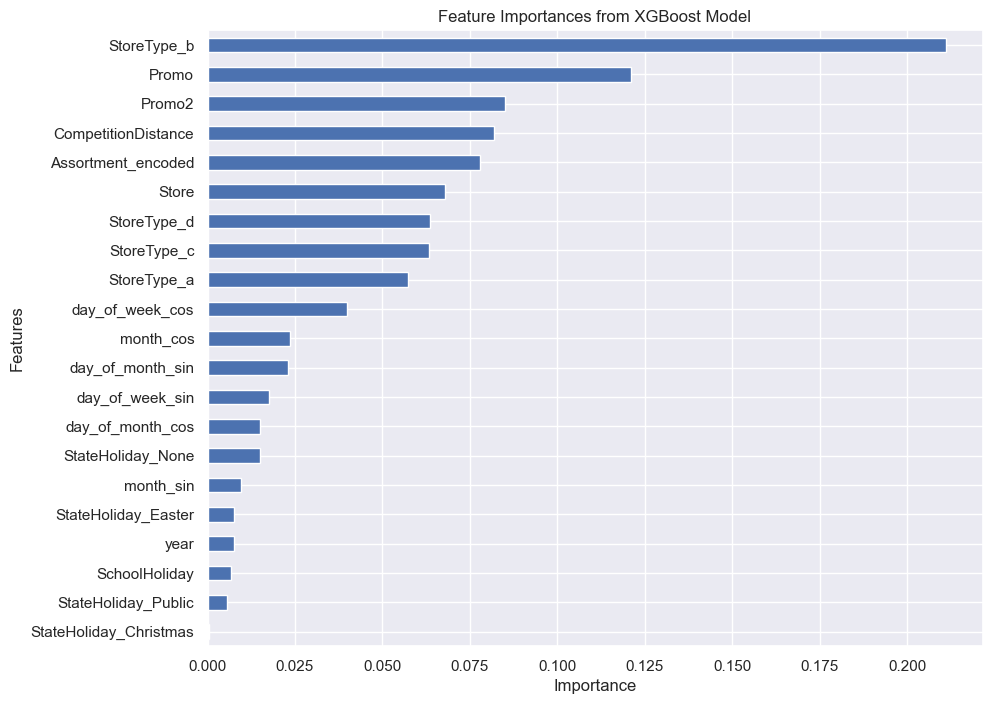

In [153]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'X' has column names that represent the features
feature_names = X.columns

# Extract feature importances from the model
importances = best_xgb_model.feature_importances_

# Create a pandas Series for easier plotting, using the feature names as the index
importances_series = pd.Series(importances, index=feature_names)

# Sort the importances
sorted_importances = importances_series.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='barh')
plt.title('Feature Importances from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [234]:
print("Sorted Feature Importances:")
print(sorted_importances)

# Access feature importances by feature name
for feature in feature_names:
    importance = importances_series[feature]
    print(f"{feature}: {importance}")

Sorted Feature Importances:
StateHoliday_Christmas    0.000442
StateHoliday_Public       0.005706
SchoolHoliday             0.006665
year                      0.007435
StateHoliday_Easter       0.007552
month_sin                 0.009445
StateHoliday_None         0.014954
day_of_month_cos          0.015110
day_of_week_sin           0.017503
day_of_month_sin          0.022937
month_cos                 0.023658
day_of_week_cos           0.039775
StoreType_a               0.057371
StoreType_c               0.063178
StoreType_d               0.063674
Store                     0.067881
Assortment_encoded        0.077888
CompetitionDistance       0.081911
Promo2                    0.084869
Promo                     0.121137
StoreType_b               0.210911
dtype: float32
Store: 0.06788087636232376
Promo: 0.12113665044307709
SchoolHoliday: 0.006664527580142021
CompetitionDistance: 0.081911101937294
Promo2: 0.0848693773150444
year: 0.007434690836817026
month_sin: 0.00944498647004366
month_co

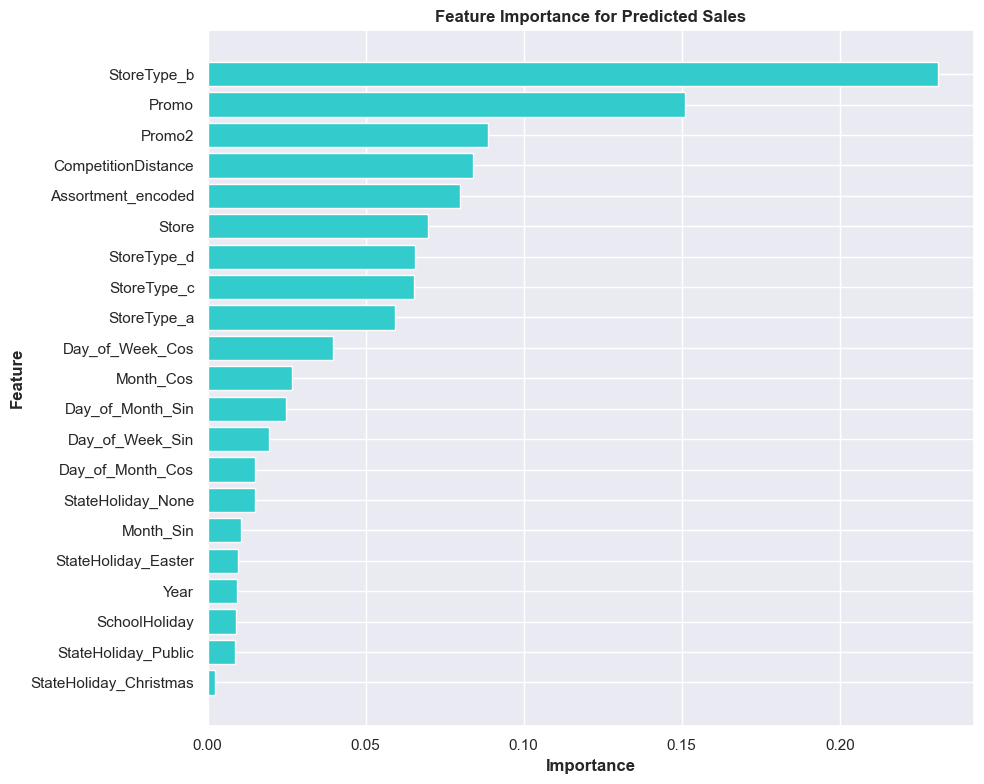

In [237]:
feature_importance_data = {
    "Feature": [
        "StateHoliday_Christmas", "StateHoliday_Public", "SchoolHoliday", "Year",
        "StateHoliday_Easter", "Month_Sin", "StateHoliday_None", "Day_of_Month_Cos",
        "Day_of_Week_Sin", "Day_of_Month_Sin", "Month_Cos", "Day_of_Week_Cos",
        "StoreType_a", "StoreType_c", "StoreType_d", "Store",
        "Assortment_encoded", "CompetitionDistance", "Promo2", "Promo", "StoreType_b"
    ],
    "Importance": [
        0.002420, 0.008706, 0.008995, 0.009435,
        0.009552, 0.010445, 0.014954, 0.015110,
        0.019503, 0.024937, 0.026658, 0.039775,
        0.059371, 0.065178, 0.065674, 0.069881,
        0.079888, 0.083911, 0.088869, 0.151137, 0.230911
    ]
}

feature_df = pd.DataFrame(feature_importance_data)

# Sorting the DataFrame based on importance for better visualization
feature_df_sorted = feature_df.sort_values(by='Importance', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))

# Creating the bar plot with the preferred color
plt.barh(feature_df_sorted['Feature'], feature_df_sorted['Importance'], color='#33CCCC')

# Adding labels and title for clarity
plt.xlabel('Importance', weight='bold')
plt.ylabel('Feature', weight='bold')
plt.title('Feature Importance for Predicted Sales', weight='bold')

plt.tight_layout()
plt.savefig('p.png')
plt.show()

In [156]:
# Make predictions on the validation set using the trained pipeline
validation_predictions = best_xgb_model.predict(validation_X)

# Now, calculate RMSE in the original scale
rmse_original = np.sqrt(mean_squared_error(y_test_original, predictions_original))

print("RMSE in original scale:", rmse_original)
# Calculate Mean Squared Error on the validation set
validation_mse = mean_squared_error(validation_y, validation_predictions)

# Calculate Root Mean Squared Error on the validation set
validation_rmse = np.sqrt(validation_mse)

# Calculate R-squared on the validation set
validation_r2 = r2_score(validation_y, validation_predictions)

# Print the evaluation metrics
print(f'Validation Mean Squared Error: {validation_mse}')
print(f'Validation Root Mean Squared Error: {validation_rmse}')
print(f'Validation R-squared: {validation_r2}')

RMSE in original scale: 0.25403707576310725
Validation Mean Squared Error: 1127541.8119156763
Validation Root Mean Squared Error: 1061.8577173593817
Validation R-squared: 0.8808665386722687


In [155]:
#Test set needs to be transformed

In [195]:
test_copy = pd.merge(test, stores, how = "left", on = 'Store')

In [196]:
test_copy['Date'] = pd.to_datetime(test_copy['Date'], dayfirst=True)
test_copy.index = test_copy['Date']
test_copy= test_copy.sort_index(ascending = True)

In [197]:
test_copy = test_copy[test_copy['Open'] == 1]

In [198]:
map_dict = {0: 'None', 'a': 'Public', 'b':'Easter', 'c':'Christmas'}

test_copy['StateHoliday'] = test_copy['StateHoliday'].map(map_dict)
test_copy['StateHoliday'] = test_copy['StateHoliday'].fillna('None')

In [199]:
test_copy["day_of_month"] = test_copy.index.day
test_copy["year"] = test_copy.index.year
test_copy['day_of_week'] = test_copy.index.dayofweek
test_copy['month'] = test_copy.index.month

In [200]:
max_value = 12
test_copy['month_sin'] = np.sin(2 * np.pi * test_copy['month'] / max_value)
test_copy['month_cos'] = np.cos(2 * np.pi * test_copy['month'] / max_value)

In [201]:
max_day_of_month = 31

# Cyclical transformation
test_copy['day_of_month_sin'] = np.sin(2 * np.pi * test_copy['day_of_month'] / max_day_of_month)
test_copy['day_of_month_cos'] = np.cos(2 * np.pi * test_copy['day_of_month'] / max_day_of_month)

In [202]:
# Perform the cyclical transformation
max_day_of_week = 6
test_copy['day_of_week_sin'] = np.sin(2 * np.pi * test_copy['DayOfWeek'] / (max_day_of_week + 1))
test_copy['day_of_week_cos'] = np.cos(2 * np.pi * test_copy['DayOfWeek'] / (max_day_of_week + 1))

In [203]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Assortment' column
test_copy['Assortment_encoded'] = label_encoder.fit_transform(test_copy['Assortment'])

In [204]:
test_copy = pd.get_dummies(test_copy, columns=['StateHoliday', 'StoreType'], dtype=int)

In [205]:
model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844392 entries, 2013-01-01 to 2015-07-31
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Store                   844392 non-null  int64         
 1   Date                    844392 non-null  datetime64[ns]
 2   Sales                   844392 non-null  int64         
 3   Promo                   844392 non-null  int64         
 4   SchoolHoliday           844392 non-null  int64         
 5   CompetitionDistance     844392 non-null  float64       
 6   Promo2                  844392 non-null  int64         
 7   year                    844392 non-null  int32         
 8   month_sin               844392 non-null  float64       
 9   month_cos               844392 non-null  float64       
 10  day_of_month_sin        844392 non-null  float64       
 11  day_of_month_cos        844392 non-null  float64       
 12  day_of_week_si

In [206]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35093 entries, 2015-08-01 to 2015-09-17
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      35093 non-null  int64         
 1   DayOfWeek                  35093 non-null  int64         
 2   Date                       35093 non-null  datetime64[ns]
 3   Sales                      0 non-null      float64       
 4   Customers                  0 non-null      float64       
 5   Open                       35093 non-null  float64       
 6   Promo                      35093 non-null  int64         
 7   SchoolHoliday              35093 non-null  int64         
 8   Assortment                 35093 non-null  object        
 9   CompetitionDistance        35028 non-null  float64       
 10  CompetitionOpenSinceMonth  22090 non-null  float64       
 11  CompetitionOpenSinceYear   22090 non-null  float64

In [207]:
test_copy = test_copy.drop(['DayOfWeek', 'Customers', 'Open', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Assortment', 'month', 'day_of_week', 'day_of_month'], axis=1)

In [208]:
test_copy['StateHoliday_Christmas'] = 0
test_copy['StateHoliday_Easter'] = 0

In [209]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35093 entries, 2015-08-01 to 2015-09-17
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Store                   35093 non-null  int64         
 1   Date                    35093 non-null  datetime64[ns]
 2   Sales                   0 non-null      float64       
 3   Promo                   35093 non-null  int64         
 4   SchoolHoliday           35093 non-null  int64         
 5   CompetitionDistance     35028 non-null  float64       
 6   Promo2                  35093 non-null  int64         
 7   year                    35093 non-null  int32         
 8   month_sin               35093 non-null  float64       
 9   month_cos               35093 non-null  float64       
 10  day_of_month_sin        35093 non-null  float64       
 11  day_of_month_cos        35093 non-null  float64       
 12  day_of_week_sin         35093

In [215]:
new_order = ['Store','Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'year', 'month_sin', 'month_cos', 'day_of_month_sin', 'day_of_month_cos', 
            'day_of_week_sin', 'day_of_week_cos', 'Assortment_encoded', 'StateHoliday_Christmas', 'StateHoliday_Easter', 'StateHoliday_None', 'StateHoliday_Public',  'StoreType_a', 
            'StoreType_b',  'StoreType_c'  ,'StoreType_d']

test_copy= test_copy[new_order]


In [216]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35093 entries, 2015-08-01 to 2015-09-17
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Store                   35093 non-null  int64  
 1   Promo                   35093 non-null  int64  
 2   SchoolHoliday           35093 non-null  int64  
 3   CompetitionDistance     35028 non-null  float64
 4   Promo2                  35093 non-null  int64  
 5   year                    35093 non-null  int32  
 6   month_sin               35093 non-null  float64
 7   month_cos               35093 non-null  float64
 8   day_of_month_sin        35093 non-null  float64
 9   day_of_month_cos        35093 non-null  float64
 10  day_of_week_sin         35093 non-null  float64
 11  day_of_week_cos         35093 non-null  float64
 12  Assortment_encoded      35093 non-null  int32  
 13  StateHoliday_Christmas  35093 non-null  int64  
 14  StateHoliday_Easter  

In [217]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 796280 entries, 2013-01-01 to 2015-06-11
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   796280 non-null  int64  
 1   Promo                   796280 non-null  int64  
 2   SchoolHoliday           796280 non-null  int64  
 3   CompetitionDistance     796280 non-null  float64
 4   Promo2                  796280 non-null  int64  
 5   year                    796280 non-null  int32  
 6   month_sin               796280 non-null  float64
 7   month_cos               796280 non-null  float64
 8   day_of_month_sin        796280 non-null  float64
 9   day_of_month_cos        796280 non-null  float64
 10  day_of_week_sin         796280 non-null  float64
 11  day_of_week_cos         796280 non-null  float64
 12  Assortment_encoded      796280 non-null  int32  
 13  StateHoliday_Christmas  796280 non-null  int32  
 14  Stat

In [218]:
# Assuming df_test_copy is your new dataframe without 'Sales' values
# and it's already preprocessed to match the training data format
#df_test_copy_without_sales = df_test_copy.drop('Sales', axis=1)
# Predict sales for df_test_copy
predicted_sales = best_xgb_model.predict(test_copy)

# If you've applied a log transformation (np.log1p) to the target during training,
# reverse the transformation on the predictions:
# predicted_sales = np.expm1(predicted_sales)

# Store the predicted sales values in df_test_copy
test_copy['Predicted_Sales'] = predicted_sales

# Now df_test_copy contains a new column 'Predicted_Sales' with the sales predictions

In [219]:
test_copy

,Store,Promo,SchoolHoliday,CompetitionDistance,Promo2,year,month_sin,month_cos,day_of_month_sin,day_of_month_cos,...,Assortment_encoded,StateHoliday_Christmas,StateHoliday_Easter,StateHoliday_None,StateHoliday_Public,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Predicted_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,1115,0,1,5350.0,1,2015,-0.866025,-5.000000e-01,0.201299,0.979530,...,2,0,0,1,0,0,0,0,1,7462.894043
2015-08-01,378,0,0,2140.0,0,2015,-0.866025,-5.000000e-01,0.201299,0.979530,...,2,0,0,1,0,1,0,0,0,5742.761719
2015-08-01,377,0,0,100.0,1,2015,-0.866025,-5.000000e-01,0.201299,0.979530,...,2,0,0,1,0,1,0,0,0,7189.914062
2015-08-01,373,0,0,11120.0,1,2015,-0.866025,-5.000000e-01,0.201299,0.979530,...,2,0,0,1,0,0,0,0,1,5169.831543
2015-08-01,372,0,0,4880.0,1,2015,-0.866025,-5.000000e-01,0.201299,0.979530,...,2,0,0,1,0,0,0,0,1,8440.958984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-17,732,1,0,35280.0,0,2015,-1.000000,-1.836970e-16,-0.299363,-0.954139,...,2,0,0,1,0,1,0,0,0,6968.259766
2015-09-17,731,1,0,15270.0,1,2015,-1.000000,-1.836970e-16,-0.299363,-0.954139,...,0,0,0,1,0,1,0,0,0,9601.946289
2015-09-17,729,1,0,8980.0,0,2015,-1.000000,-1.836970e-16,-0.299363,-0.954139,...,2,0,0,1,0,0,0,1,0,10462.028320


In [226]:
test_copy.to_csv('data.csv', index=True)

In [220]:
daily_sales = test_copy['Predicted_Sales'].resample('D').sum()

In [221]:
daily_sales

Date
2015-08-01    5.310158e+06
2015-08-02    2.325968e+05
2015-08-03    8.164192e+06
2015-08-04    6.649028e+06
2015-08-05    6.145560e+06
2015-08-06    6.080376e+06
2015-08-07    5.975427e+06
2015-08-08    4.663585e+06
2015-08-09    2.108671e+05
2015-08-10    5.165509e+06
2015-08-11    4.918114e+06
2015-08-12    4.761544e+06
2015-08-13    4.805455e+06
2015-08-14    4.964646e+06
2015-08-15    3.850234e+06
2015-08-16    2.097360e+05
2015-08-17    8.295838e+06
2015-08-18    6.759686e+06
2015-08-19    6.338045e+06
2015-08-20    6.170027e+06
2015-08-21    6.177049e+06
2015-08-22    4.675924e+06
2015-08-23    2.066498e+05
2015-08-24    4.971734e+06
2015-08-25    4.640556e+06
2015-08-26    4.475510e+06
2015-08-27    4.628764e+06
2015-08-28    5.582594e+06
2015-08-29    5.077642e+06
2015-08-30    2.246839e+05
2015-08-31    8.683384e+06
2015-09-01    7.173256e+06
2015-09-02    6.688798e+06
2015-09-03    6.363543e+06
2015-09-04    6.242098e+06
2015-09-05    4.767914e+06
2015-09-06    1.915732e

In [222]:
unique_values = test['StateHoliday'].unique()

# Print unique values
print("Unique values in 'State Holiday' column:")
for value in unique_values:
    print(value)

Unique values in 'State Holiday' column:
0
a


In [223]:
value_to_check = 'a'

# Filter the DataFrame based on the value
dates_with_value = test[test['StateHoliday'] == value_to_check]['Date']

# Print the dates that have the specified value
if not dates_with_value.empty:
    print(f"The dates with '{value_to_check}' are:")
    print(dates_with_value)
else:
    print(f"No dates with '{value_to_check}' found.")

The dates with 'a' are:
28256    15/08/2015
28261    15/08/2015
28263    15/08/2015
28271    15/08/2015
28274    15/08/2015
            ...    
29086    15/08/2015
29092    15/08/2015
29094    15/08/2015
29097    15/08/2015
29098    15/08/2015
Name: Date, Length: 180, dtype: object


In [224]:
value_to_check = 'a'

# Filter the DataFrame based on the value
filtered_df = test[test['StateHoliday'] == value_to_check]

# Check if there are any instances of the value
if not filtered_df.empty:
    print(f"The dates with '{value_to_check}' are:")
    for index, row in filtered_df.iterrows():
        print(index, row['Date'])
else:
    print(f"No dates with '{value_to_check}' found.")

The dates with 'a' are:
28256 15/08/2015
28261 15/08/2015
28263 15/08/2015
28271 15/08/2015
28274 15/08/2015
28278 15/08/2015
28282 15/08/2015
28287 15/08/2015
28288 15/08/2015
28291 15/08/2015
28302 15/08/2015
28306 15/08/2015
28310 15/08/2015
28315 15/08/2015
28322 15/08/2015
28323 15/08/2015
28328 15/08/2015
28333 15/08/2015
28334 15/08/2015
28342 15/08/2015
28344 15/08/2015
28347 15/08/2015
28349 15/08/2015
28350 15/08/2015
28351 15/08/2015
28356 15/08/2015
28357 15/08/2015
28360 15/08/2015
28365 15/08/2015
28368 15/08/2015
28372 15/08/2015
28373 15/08/2015
28379 15/08/2015
28380 15/08/2015
28385 15/08/2015
28387 15/08/2015
28389 15/08/2015
28393 15/08/2015
28394 15/08/2015
28395 15/08/2015
28404 15/08/2015
28412 15/08/2015
28415 15/08/2015
28425 15/08/2015
28433 15/08/2015
28447 15/08/2015
28450 15/08/2015
28458 15/08/2015
28459 15/08/2015
28461 15/08/2015
28464 15/08/2015
28465 15/08/2015
28467 15/08/2015
28468 15/08/2015
28475 15/08/2015
28483 15/08/2015
28492 15/08/2015
28511 1

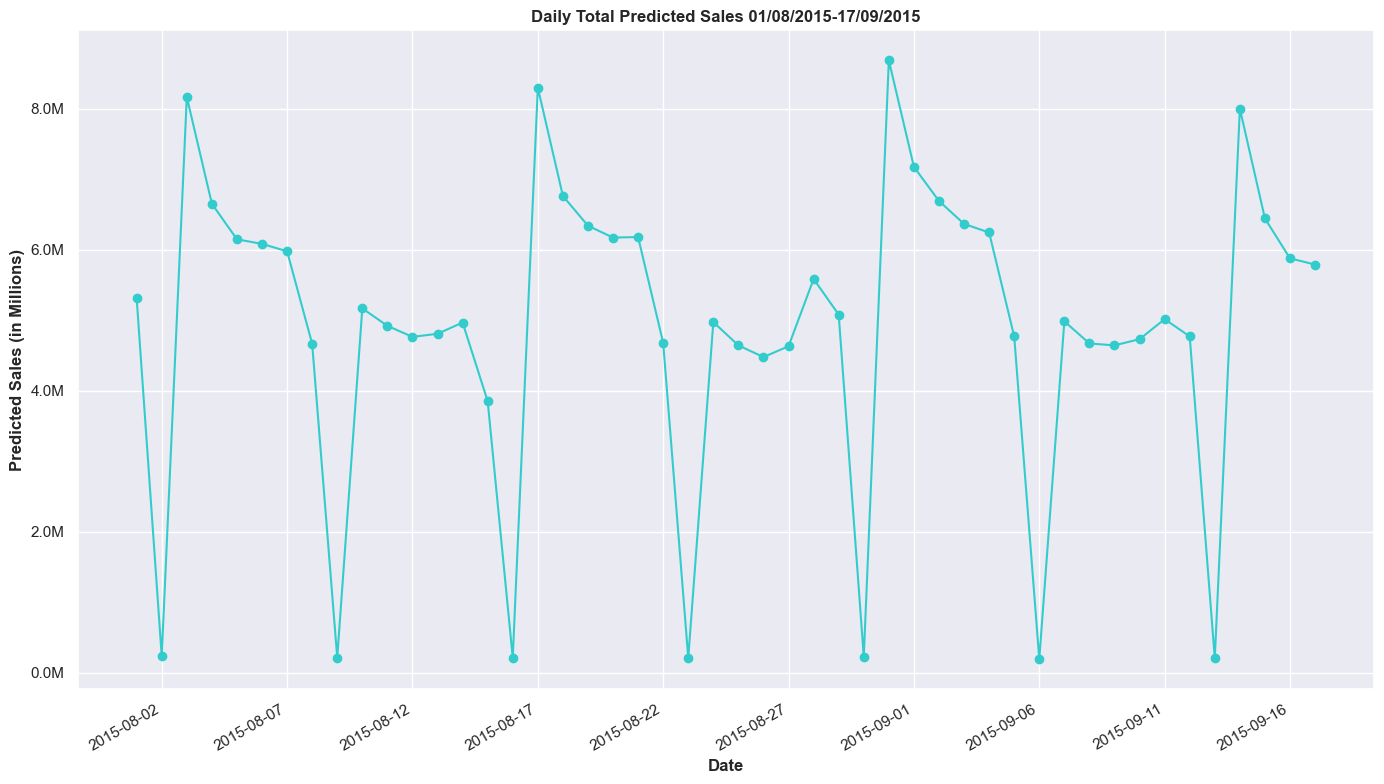

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Creating a DataFrame from the provided data
data = {
    "Date": [
        "2015-08-01", "2015-08-02", "2015-08-03", "2015-08-04", "2015-08-05",
        "2015-08-06", "2015-08-07", "2015-08-08", "2015-08-09", "2015-08-10",
        "2015-08-11", "2015-08-12", "2015-08-13", "2015-08-14", "2015-08-15",
        "2015-08-16", "2015-08-17", "2015-08-18", "2015-08-19", "2015-08-20",
        "2015-08-21", "2015-08-22", "2015-08-23", "2015-08-24", "2015-08-25",
        "2015-08-26", "2015-08-27", "2015-08-28", "2015-08-29", "2015-08-30",
        "2015-08-31", "2015-09-01", "2015-09-02", "2015-09-03", "2015-09-04",
        "2015-09-05", "2015-09-06", "2015-09-07", "2015-09-08", "2015-09-09",
        "2015-09-10", "2015-09-11", "2015-09-12", "2015-09-13", "2015-09-14",
        "2015-09-15", "2015-09-16", "2015-09-17"
    ],
    "Predicted Sales": [
        5.310158e+06, 2.325968e+05, 8.164192e+06, 6.649028e+06, 6.145560e+06,
        6.080376e+06, 5.975427e+06, 4.663585e+06, 2.108671e+05, 5.165509e+06,
        4.918114e+06, 4.761544e+06, 4.805455e+06, 4.964646e+06, 3.850234e+06,
        2.097360e+05, 8.295838e+06, 6.759686e+06, 6.338045e+06, 6.170027e+06,
        6.177049e+06, 4.675924e+06, 2.066498e+05, 4.971734e+06, 4.640556e+06,
        4.475510e+06, 4.628764e+06, 5.582594e+06, 5.077642e+06, 2.246839e+05,
        8.683384e+06, 7.173256e+06, 6.688798e+06, 6.363543e+06, 6.242098e+06,
        4.767914e+06, 1.915732e+05, 4.982140e+06, 4.667996e+06, 4.641146e+06,
        4.728971e+06, 5.013052e+06, 4.768227e+06, 2.004692e+05, 7.997934e+06,
        6.440660e+06, 5.875329e+06, 5.787372e+06
    ]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(14, 8))

# Using a pretty color close to #33CCCC for the plot
plt.plot(df['Date'], df['Predicted Sales'], marker='o', color='#33CCCC')

# Formatting the date to make the x-axis tidy
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()  # Rotation

# Changing the y-axis to display numbers in a more readable format, avoiding scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6}M'))

# Adding labels and title for clarity
plt.xlabel('Date', weight='bold')
plt.ylabel('Predicted Sales (in Millions)', weight='bold')
plt.title('Daily Total Predicted Sales 01/08/2015-17/09/2015', weight='bold')

plt.tight_layout()
plt.savefig('predicted_sales.png')
plt.show()